In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
960
540


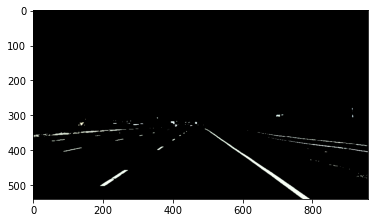

In [6]:
#Check out the code below. First, I import pyplot and image from matplotlib. I also import numpy for operating on the image.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#I then read in an image and print out some stats. I’ll grab the x and y sizes and make a copy of the image to work with. NOTE: Always make a copy of arrays or other variables in Python. If instead, you say "a = b" then all changes you make to "a" will be reflected in "b" as well!

# Read in the image and print out some stats
image = mpimg.imread('assignment_material/test.jpeg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

print(xsize);print(ysize)
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)
#Next I define a color threshold in the variables red_threshold, green_threshold, and blue_threshold and populate rgb_threshold with these values. This vector contains the minimum values for red, green, and blue (R,G,B) that I will allow in my selection.

# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]
#Next, I'll select any pixels below the threshold and set them to zero.

#After that, all pixels that meet my color criterion (those above the threshold) will be retained, and those that do not (below the threshold) will be blacked out.

# Identify pixels below the threshold 
thresholds = (image[:,:,0] < rgb_threshold[0])| (image[:,:,1] < rgb_threshold[1])| (image[:,:,2] < rgb_threshold[2])
#thresholds 보다 작은 즉 어두운 값을 갖는 사진은 1의 값을 갖게 되어, [0,0,0] 으로 설정되는 대상이 된다.
color_select[thresholds] = [0,0,0]                  #이미지에서 threshold부분에 1인 부분 즉 밝은 색인 부분을 모두 0으로 만든다.

# Display the image                 
plt.imshow(color_select)
plt.show()


This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


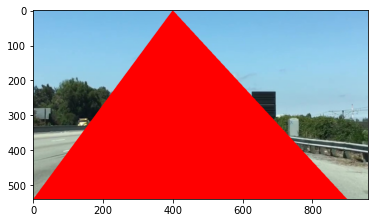

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('assignment_material/test.jpeg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 540]
right_bottom = [900, 540]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

#y = ax + b 보다 크고 작고 (위아래) 관계를 이용해서 중간 구간을 잘라온다. 이때 카메라의 좌표계에 고려해야하는 것에 주의해야한다.
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()

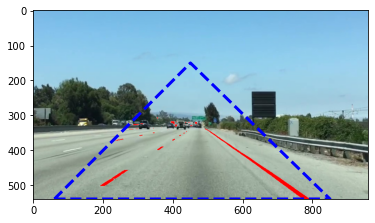

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('assignment_material/test.jpeg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [60, 540]
right_bottom = [850, 540]
apex = [450, 150]


# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# 흑백 사진 필터링 작업 (어두운 부분을 없앤다)
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
#region_thresholds 의 내부부분이 모두 1에 해당하기에 ~region_thresholds 를 진행하면, color_thresholds 가 0이 아닌 부분 
#즉 삼각형내부 도로부분만 남게 된다.
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met

#~color_thresholds 를 하면 이상적인 흑백으로 나뉘게 된다. 그에 대해 region_thresholds 와의 and 연산을 진행하면, 차선이 붉은 색이 된다.
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
#plt.imshow(image)

#아래 좌표를 따라가면 삼각형을 모두 지나게 된다. 그와 같이 plot 을 진행한다. b-- 는 파란색 점선을 의미한다. lw 는 line width를 의미한다.
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=3)
#plt.imshow(color_select)
plt.imshow(line_image)



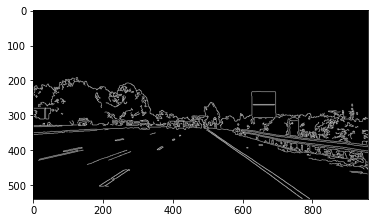

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
image = mpimg.imread('../assignment_material/test.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')

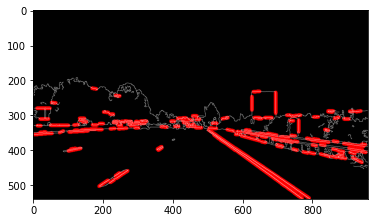

In [8]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('../assignment_material/test.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
masked_edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 2
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((masked_edges, masked_edges, masked_edges)) 

# Draw the lines on the edge image (이미지 두개 combine)
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 1) 
plt.imshow(combo)


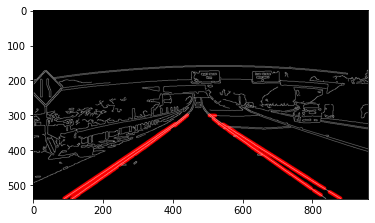

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('assignment_material/exit-ramp.jpeg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   


# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(50,imshape[0]),(420, 300), (520, 300), (900,imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 15 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) #cv2.Canny 로 만든 edge 이미지의 경우 3개의 이미지를 합쳐줘야할 필요가 있는 것으로 이해했다.

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)